<a href="https://colab.research.google.com/github/Ashutosh-Choubey/Attendance_Manager/blob/master/Diabetic_Retinopathy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing all the necessary libraries for the project. 

In [ ]:
import keras
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from keras.models import Model,Sequential
from keras.preprocessing import image
from keras.optimizers import Adam
import numpy as np
import pandas as pd
from pandas import DataFrame
import cv2
from PIL import Image

reading the csv file in which images are placed with its label. Before this uploaded the train.csv file of the dataset from PC to the files in colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data_set1=pd.read_csv("/content/drive/My Drive/messidor_data2-final.csv")

In [ ]:
data_set1

,image_id,adjudicated_dr_grade
0,20051020_43808_0100_PP.png,0
1,20051020_43832_0100_PP.png,1
2,20051020_43882_0100_PP.png,1
3,20051020_43906_0100_PP.png,2
4,20051020_44261_0100_PP.png,0
...,...,...
1739,IM004806.JPG,0
1740,IM004811.JPG,1
1741,IM004812.JPG,2
1742,IM004831.JPG,0


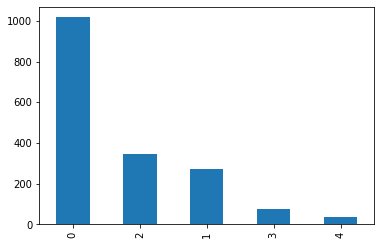

In [ ]:
data_set=DataFrame(data_set1)
# data_set=data_set.groupby('adjudicated_dr_grade')
data_set['adjudicated_dr_grade'].value_counts().plot(kind = 'bar')

unzipping the images in the zip folder

In [ ]:
! unzip /content/drive/My\ Drive/IMAGES2.zip -d /content/IMAGES

Archive:  /content/drive/My Drive/IMAGES2.zip
  inflating: /content/IMAGES/IMAGES/20051020_43808_0100_PP.png  
  inflating: /content/IMAGES/IMAGES/20051020_43832_0100_PP.png  
  inflating: /content/IMAGES/IMAGES/20051020_43882_0100_PP.png  
  inflating: /content/IMAGES/IMAGES/20051020_43906_0100_PP.png  
  inflating: /content/IMAGES/IMAGES/20051020_44261_0100_PP.png  
  inflating: /content/IMAGES/IMAGES/20051020_44284_0100_PP.png  
  inflating: /content/IMAGES/IMAGES/20051020_44338_0100_PP.png  
  inflating: /content/IMAGES/IMAGES/20051020_44349_0100_PP.png  
  inflating: /content/IMAGES/IMAGES/20051020_44400_0100_PP.png  
  inflating: /content/IMAGES/IMAGES/20051020_44431_0100_PP.png  
  inflating: /content/IMAGES/IMAGES/20051020_44598_0100_PP.png  
  inflating: /content/IMAGES/IMAGES/20051020_44636_0100_PP.png  
  inflating: /content/IMAGES/IMAGES/20051020_44692_0100_PP.png  
  inflating: /content/IMAGES/IMAGES/20051020_44714_0100_PP.png  
  inflating: /content/IMAGES/IMAGES/20051020

DATA PREPROCESSING

In [ ]:
image_train=[]
for i in range(data_set1.shape[0]):
  img=cv2.imread("IMAGES/IMAGES/"+data_set1['image_id'][i])
  img=cv2.resize(img,(256,256))
  img=img/255
  image_train.append(img)
X=np.array(image_train)

In [ ]:
y=np.array(data_set1.drop(['image_id'],axis=1))
Y=np.zeros((X.shape[0],5))
for i in range(y.shape[0]):
  if np.isnan(y[i][0]):
    y[i][0]=0
  Y[i][int(y[i][0])]=1

Main model for executimg the cnn.
We will use

AlexNet,

Inception,

VGG-16,

ResNet,

Anyone of these architecture for our model

Starting with AlexNet

In [ ]:
model= Sequential()
model.add(Conv2D(96,(11,11),strides=(4,4),padding='same',activation='relu',input_shape=(256,256,3)))
model.add(MaxPool2D((3,3),2))
model.add(Conv2D(256,(5,5),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D((3,3),2))
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same'))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same'))
model.add(MaxPool2D((3,3),2))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(Dense(5,activation='softmax'))
model.summary()
model.compile(Adam(learning_rate=0.001),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 31, 31, 256)       614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 384)       885120    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 384)       1327488   
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 256)      

RESNET MODEL


In [ ]:
from keras.applications.resnet50 import ResNet50

In [ ]:
base_model = ResNet50(include_top=False, input_shape=(256,256,3))
x = base_model.output
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
x = Dense(16, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)
model2 = Model(inputs=base_model.input, outputs=predictions)

model2.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])
predictions.shape
model2.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________

VGG-16

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
base_model2=VGG16(include_top=False,input_shape=(256,256,3))
x2=base_model2.output
x2=Flatten()(x2)
x2=Dense(4096,activation='relu')(x2)
predictions2=Dense(5,activation='softmax')(x2)
model3=Model(inputs=base_model2.input,outputs=predictions2)
model3.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model3.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_______________________________________________________

INCEPTIONV3

In [ ]:
from keras.applications.inception_v3 import InceptionV3

In [ ]:
base_model=InceptionV3(include_top=False,input_shape=(256,256,3))
x =base_model.output
x=GlobalAveragePooling2D()(x)
x = Dense(4096, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)
model4 = Model(inputs=base_model.input, outputs=predictions)
model4.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])
model4.summary()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_104 (Conv2D)             (None, 127, 127, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 127, 127, 32) 96          conv2d_104[0][0]                 
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 127, 127, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [ ]:
model.fit(X,Y,epochs=50,batch_size=30) #training alexnet model


Epoch 1/50
59/59 [==============================] - 2s 41ms/step - loss: 1.6479 - accuracy: 0.5310
Epoch 2/50
59/59 [==============================] - 2s 38ms/step - loss: 1.1560 - accuracy: 0.5831
Epoch 3/50
59/59 [==============================] - 2s 38ms/step - loss: 1.1618 - accuracy: 0.5831
Epoch 4/50
59/59 [==============================] - 2s 38ms/step - loss: 1.1730 - accuracy: 0.5831
Epoch 5/50
59/59 [==============================] - 2s 38ms/step - loss: 1.1598 - accuracy: 0.5831
Epoch 6/50
59/59 [==============================] - 2s 38ms/step - loss: 1.1548 - accuracy: 0.5831
Epoch 7/50
59/59 [==============================] - 2s 39ms/step - loss: 1.1536 - accuracy: 0.5831
Epoch 8/50
59/59 [==============================] - 2s 38ms/step - loss: 1.1544 - accuracy: 0.5831
Epoch 9/50
59/59 [==============================] - 2s 39ms/step - loss: 1.1560 - accuracy: 0.5831
Epoch 10/50
59/59 [==============================] - 2s 39ms/step - loss: 1.1471 - accuracy: 0.5831
Epoch 11/

In [ ]:
model2.fit(X,Y,epochs=50,batch_size=30) #training resnet model

Epoch 1/50
59/59 [==============================] - 12s 212ms/step - loss: 3.0719 - accuracy: 0.4300
Epoch 2/50
59/59 [==============================] - 12s 207ms/step - loss: 1.4149 - accuracy: 0.5476
Epoch 3/50
59/59 [==============================] - 12s 207ms/step - loss: 1.4501 - accuracy: 0.5654
Epoch 4/50
59/59 [==============================] - 12s 207ms/step - loss: 1.2670 - accuracy: 0.5642
Epoch 5/50
59/59 [==============================] - 12s 207ms/step - loss: 1.2877 - accuracy: 0.5550
Epoch 6/50
59/59 [==============================] - 12s 208ms/step - loss: 1.2170 - accuracy: 0.5614
Epoch 7/50
59/59 [==============================] - 12s 208ms/step - loss: 1.1509 - accuracy: 0.5659
Epoch 8/50
59/59 [==============================] - 12s 207ms/step - loss: 1.1304 - accuracy: 0.5780
Epoch 9/50
59/59 [==============================] - 12s 208ms/step - loss: 1.1405 - accuracy: 0.5734
Epoch 10/50
59/59 [==============================] - 12s 208ms/step - loss: 1.0968 - accura

Code for saving the model weights and architecture

In [ ]:
model_json = model2.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model2.save_weights("model2.h5")

In [ ]:
model3.fit(X,Y,batch_size=50,epochs=30) #training VGG16 model

Epoch 1/30
 950/1744 [===============>..............] - ETA: 24s - loss: 1.1437 - accuracy: 0.5747

KeyboardInterrupt: ignored

In [ ]:
model4.fit(X,Y,batch_size=30,epochs=50) #training InceptionV3 model

Epoch 1/50
1744/1744 [==============================] - 86s 49ms/step - loss: 1.9621 - accuracy: 0.5436
Epoch 2/50
1744/1744 [==============================] - 63s 36ms/step - loss: 1.1870 - accuracy: 0.5763
Epoch 3/50
1744/1744 [==============================] - 63s 36ms/step - loss: 1.1294 - accuracy: 0.5722
Epoch 4/50
1744/1744 [==============================] - 63s 36ms/step - loss: 1.1109 - accuracy: 0.5808
Epoch 5/50
1744/1744 [==============================] - 63s 36ms/step - loss: 1.1124 - accuracy: 0.5963
Epoch 6/50
1744/1744 [==============================] - 63s 36ms/step - loss: 1.0546 - accuracy: 0.6015
Epoch 7/50
1744/1744 [==============================] - 64s 36ms/step - loss: 1.0422 - accuracy: 0.6170
Epoch 8/50
1744/1744 [==============================] - 64s 36ms/step - loss: 1.0294 - accuracy: 0.6015
Epoch 9/50
1744/1744 [==============================] - 64s 36ms/step - loss: 1.0219 - accuracy: 0.6072
Epoch 10/50
1744/1744 [==============================] - 64s 37m

Code for saving the model weigths and architecture

In [ ]:
model_json = model4.to_json()
with open("model4-50epochs.json", "w") as json_file:

    json_file.write(model_json)
# serialize weights to HDF5
model4.save_weights("model4-50epochs.h5")

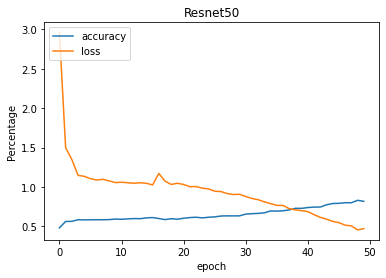

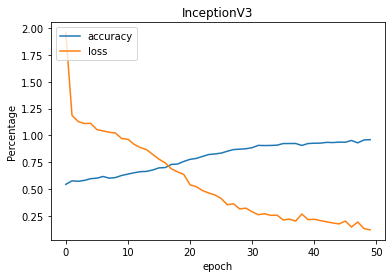

In [ ]:
import matplotlib.pyplot as plt
'''plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['loss'])
plt.title('AlexNet')
plt.ylabel('Percentage')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()'''
plt.plot(model2.history.history['accuracy'])
plt.plot(model2.history.history['loss'])
plt.title('Resnet50')
plt.ylabel('Percentage')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()
plt.plot(model4.history.history['accuracy'])
plt.plot(model4.history.history['loss'])
plt.title('InceptionV3')
plt.ylabel('Percentage')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()